## Speech Data Augmentation

In [2]:
import os
import yaml
import numpy as np
from pathlib import Path
from matplotlib import pyplot as plt
import IPython.display as ipd
import librosa
import pandas as pd
from random import sample
import soundfile as sf
import scipy.io.wavfile
from src.data_aug.utils import generate_file_name, read_yaml_config, print_plot_play
from src.data_aug.audio_augmentation import Augmenter
from src.routines.augmentation import run_sequential_augmentation, run_parallel_augmentation
%matplotlib inline

### DATA AUGMENTATION
methods: 
* Stretch Time, 
* Shift Pitch, 
* Control Volume, 
* Add Noise
* Shift Time.

### Helper functions

In [3]:
# Check out project src

### Config

In [5]:
config = read_yaml_config(Path("src/config/config.yml"))
config

{'augmentation_job': {'approach': 'SEQ',
  'export': True,
  'paths': {'import_path': '/Users/djolle87/Projects/data_augmentation/data/test_data2/',
   'export_path': '/Users/djolle87/Projects/data_augmentation/data/'}},
 'augmentation_approach': {'sequential': {'sequence': ['time_stretch',
    'pitch_shift',
    'volume_control',
    'add_noise',
    'time_shift']},
  'parallel': {'methods': ['time_stretch',
    'pitch_shift',
    'volume_control',
    'add_noise',
    'time_shift'],
   'n_methods': 5}},
 'augmentation_method': {'time_stretch': {'rate': 2},
  'pitch_shift': {'sr': 22050, 'bins_per_octave': 12, 'n_steps': -18},
  'volume_control': {'gain_dB': 3},
  'add_noise': {'snr_db': 20},
  'time_shift': {'shift_pct': -10}},
 'file_suffixes': {'generate_suffixes': True,
  'detailed_suffixes': True,
  'time_stretch': {'suffix': '_TST'},
  'pitch_shift': {'suffix': '_PSH'},
  'volume_control': {'suffix': '_VC'},
  'add_noise': {'suffix': '_AN'},
  'time_shift': {'suffix': '_TSH'}}}

### Original

WAV file: broj1_2_10n.WAV Fs = 22050, x.shape = (14730,), x.dtype = float32


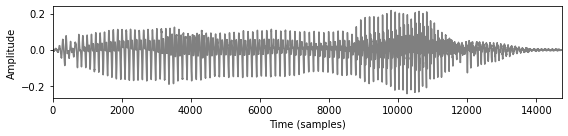

In [6]:
# Read wav
original_fn = "broj1_2_10n.WAV"
x, Fs = librosa.load(f"data/govornik2_brojevi_n/{original_fn}", sr=None)
print_plot_play(x=x, sr=Fs, text=f'WAV file: {original_fn}')

### Stretch Time

In [7]:
aug = Augmenter(input_signal=x, file_name=original_fn)

x_fast = aug.time_stretch(rate=2.0)
x_slow = aug.time_stretch(rate=0.5)

WAV file: broj1_2_10n_TST_R2.0.WAV Fs = 22050, x.shape = (7365,), x.dtype = float32


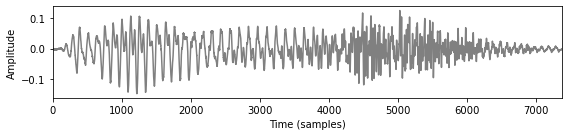

In [8]:

print_plot_play(x=x_fast, sr=Fs, text=f'WAV file: {original_fn.split(".")[0] + "_TST_R2.0" + ".WAV"}')

WAV file: broj1_2_10n_TST_R0.5.WAV Fs = 22050, x.shape = (29460,), x.dtype = float32


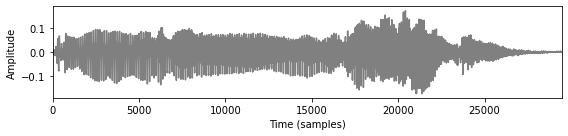

In [9]:
print_plot_play(x=x_slow, sr=Fs, text=f'WAV file: {original_fn.split(".")[0] + "_TST_R0.5" + ".WAV"}')

### Shift pitch

In [10]:
x_third = aug.pitch_shift(sr=Fs, bins_per_octave=12, n_steps=4)
x_tritone = aug.pitch_shift(sr=Fs, bins_per_octave=12, n_steps=-6)

WAV file: broj1_2_10n_PSH_SR22050_BPO12_N4.WAV Fs = 22050, x.shape = (14730,), x.dtype = float32


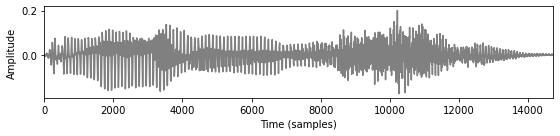

In [11]:
print_plot_play(x=x_third, sr=Fs, text=f'WAV file: {original_fn.split(".")[0] + "_PSH_SR22050_BPO12_N4" + ".WAV"}')

WAV file: broj1_2_10n_PSH_SR22050_N-6.WAV Fs = 22050, x.shape = (14730,), x.dtype = float32


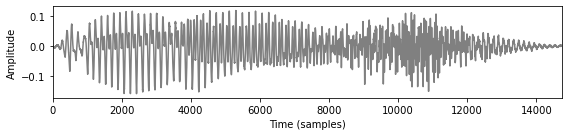

In [12]:
print_plot_play(x=x_tritone, sr=Fs, text=f'WAV file: {original_fn.split(".")[0] + "_PSH_SR22050_N-6" + ".WAV"}')

### Control Volume

WAV file: broj1_2_10n_VC_G10.WAV Fs = 22050, x.shape = (14730,), x.dtype = float32


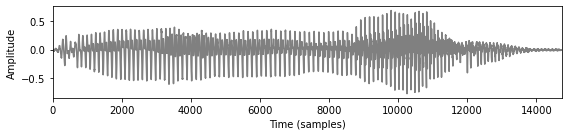

In [13]:
x_vol = aug.volume_control(gain_dB=10)
print_plot_play(x=x_vol, sr=Fs, text=f'WAV file: {original_fn.split(".")[0] + "_VC_G10" + ".WAV"}')

### Shift Time

WAV file: broj1_2_10n_TSH_PCT-10.WAV Fs = 22050, x.shape = (16203,), x.dtype = float32


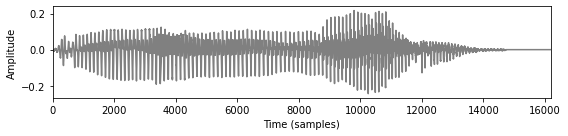

In [14]:
x_time_shift = aug.time_shift(shift_pct=-10)
print_plot_play(x=x_time_shift, sr=Fs, text=f'WAV file: {original_fn.split(".")[0] + "_TSH_PCT-10" + ".WAV"}')

### Add Noise

WAV file: broj1_2_10n_AN_SNR20.WAV Fs = 22050, x.shape = (14730,), x.dtype = float32


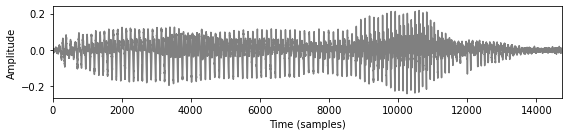

In [15]:
x_noise = aug.add_noise(snr_db=20)

print_plot_play(x=x_noise, sr=Fs, text=f'WAV file: {original_fn.split(".")[0] + "_AN_SNR20" + ".WAV"}')

## Sequential Augmentation

broj1_2_10n_TST_R2_PSH_NS-18_VC_G3_AN_SNR20_TSH_SPCT-10.wav Fs = 22050, x.shape = (8101,), x.dtype = float32


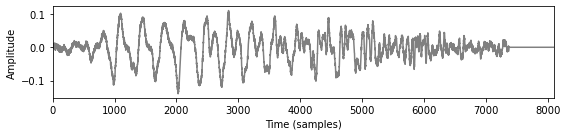

In [17]:
y, fn = run_sequential_augmentation(Path(f'data/govornik2_brojevi_n/broj1_2_10n.WAV'), 
                                config, 
                                sequence=["time_stretch", "pitch_shift", "volume_control", "add_noise", "time_shift"],
                                export=True,
                                export_path=Path("/Users/djolle87/Projects/data_augmentation/data/augmented"))

print_plot_play(x=y, sr=Fs, text=fn)

### Parallel Augmentation

broj1_2_10n_AN_SNR20.wav Fs = 22050, x.shape = (14730,), x.dtype = float32


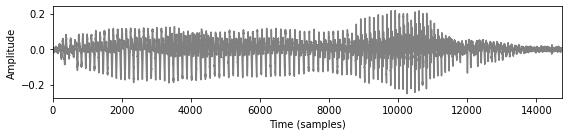

broj1_2_10n_TST_R2.wav Fs = 22050, x.shape = (7365,), x.dtype = float32


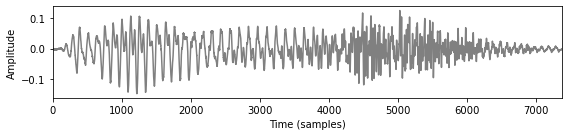

broj1_2_10n_VC_G3.wav Fs = 22050, x.shape = (14730,), x.dtype = float32


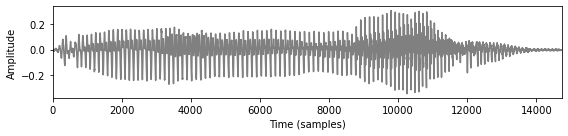

broj1_2_10n_PSH_NS-18.wav Fs = 22050, x.shape = (14730,), x.dtype = float32


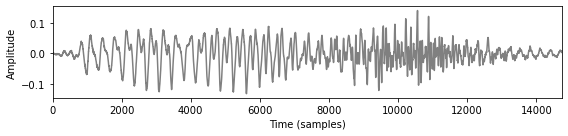

broj1_2_10n_TSH_SPCT-10.wav Fs = 22050, x.shape = (16203,), x.dtype = float32


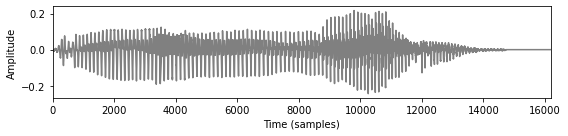

In [18]:
run_parallel_augmentation(input_signal_path=Path(f'data/govornik2_brojevi_n/broj1_2_10n.WAV'),
                      config=config, 
                      methods= ["time_stretch", "pitch_shift", "volume_control", "add_noise", "time_shift"],
                      n_methods=5, 
                      export=False,)